# Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 
## Understanding and Defining Churn

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

## Definitions of Churn

There are various ways to define churn, such as:

#### Revenue-based churn: 
Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as _**‘customers who have generated less than INR 4 per month in total/average/median revenue’**_.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

#### Usage-based churn: 
Customers **who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time**.

    A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the **usage-based definition to define _churn_ **.

 
### High-value Churn

In the Indian and the southeast Asian market,

    approximately 80% of revenue comes from the top 20% customers (called high-value customers). 
  
Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 
### Understanding the Business Objective and the Data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 
### Understanding Customer Behaviour During Churn

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

    The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

    The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

    The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Functions 
The space for user defined functions

In [2]:
def plot_triangular(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, annot=True, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [3]:
def plot_multiple_distributions(data, targets):
    scale = StandardScaler(copy=False)
    scaled_df = pd.DataFrame(scale.fit(data[targets]).transform(data[targets]), columns=targets)
    for target in targets:
        sns.distplot(scaled_df.loc[:, target], hist=False, rug=False, label=target)
    return None
    

In [4]:
import powerlaw
def power_law_analysis(data, targets):
    for target in targets:
        results = powerlaw.Fit(data.loc[:, target])
        print(results.power_law.alpha)
        print(results.power_law.xmin)
        R, p = results.distribution_compare('power_law', 'lognormal')

   ## 1. Load the data
Load the churn data for the telecom provider

In [5]:
churn_data = pd.read_csv('telecom_churn_data.csv')

total_records = churn_data.shape[0]


## 2. Missing value treatment

In [6]:
missing_value_percentage = round(100 * churn_data.isnull().sum().sort_values(ascending=False) / total_records, 2)
missing_value_percentage[missing_value_percentage > 50.0]

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [7]:
non_kpis_to_be_imputed =['max_rech_data_6', 'max_rech_data_7',  'max_rech_data_8', 'max_rech_data_9']
#This valuses doesnpt drive the KPI will replace by zero as per instruction
churn_data[non_kpis_to_be_imputed] = churn_data[non_kpis_to_be_imputed].fillna(0, axis=1)

#impute the categorical variable NaN with -1
cat_variables_to_be_imputed = ['night_pck_user_6', 'night_pck_user_7',
                               'night_pck_user_8', 'night_pck_user_9',
                               'fb_user_6', 'fb_user_7',
                               'fb_user_8', 'fb_user_9']
churn_data[cat_variables_to_be_imputed] = churn_data[cat_variables_to_be_imputed].fillna(-1, axis=1)

In [8]:
#date dependant missing values
kpis_imputed_wrt_date = dict( date_of_last_rech_data_6 = ['total_rech_data_6', 
                                                          'count_rech_2g_6', 
                                                          'count_rech_3g_6', 'av_rech_amt_data_6' ],
                             date_of_last_rech_data_7 = ['total_rech_data_7', 
                                                          'count_rech_2g_7', 
                                                          'count_rech_3g_7', 'av_rech_amt_data_7' ], 
                             date_of_last_rech_data_8 = ['total_rech_data_8', 
                                                          'count_rech_2g_8', 
                                                          'count_rech_3g_8', 'av_rech_amt_data_8'],
                             date_of_last_rech_data_9 = ['total_rech_data_9', 
                                                          'count_rech_2g_9', 
                                                          'count_rech_3g_9', 'av_rech_amt_data_9'])


In [9]:

#churn_data_clone = churn_data.copy()
#Replace the date related values if date is present 1 else 0
for date, fields in kpis_imputed_wrt_date.items():
    churn_data.loc[churn_data[date].isnull(), fields] = churn_data.loc[churn_data[date].isnull(), fields].fillna(0)
    churn_data.loc[churn_data[date].notnull(), fields] = churn_data.loc[churn_data[date].notnull(), fields].fillna(1)
        


In [10]:
#Now we can drop the date related data
date_cols = [col for col in churn_data.columns if 'date' in col.lower() ]
churn_data.drop(labels=date_cols, axis=1,  inplace=True, errors='ignore')

In [11]:
unique_val_cols=churn_data.nunique(dropna=False).sort_values()
single_value_cols = unique_val_cols[unique_val_cols < 3].index.values
#Drop the columns with single value or null since this is not going to add any information for training
churn_data.drop(labels=single_value_cols, axis=1, inplace=True)

In [12]:
[d for val in churn_data.columns if 'date'in val.lower()]

[]

In [13]:
#Let's check the other categorical data 
unique_val_cols=churn_data.nunique().sort_values()
#Get the features with atmost 35 unique values. 35 is just a jueristics
possible_cat_vars = unique_val_cols[unique_val_cols < 35].index.values
print("Possible categorical variables \n", possible_cat_vars)
#In Consulation with data dictionary the excluding the count_* features since they are quantile in nature
categorical_vars = [var for var in possible_cat_vars if 'count_' not in var]
print("Final Categorical variables \n", categorical_vars)

Possible categorical variables 
 ['night_pck_user_7' 'night_pck_user_9' 'fb_user_9' 'fb_user_8' 'fb_user_7'
 'fb_user_6' 'night_pck_user_6' 'night_pck_user_8' 'monthly_2g_6'
 'monthly_2g_9' 'monthly_2g_7' 'monthly_2g_8' 'monthly_3g_9'
 'monthly_3g_6' 'monthly_3g_8' 'monthly_3g_7' 'sachet_3g_6'
 'count_rech_3g_6' 'count_rech_3g_9' 'sachet_3g_7' 'sachet_3g_9'
 'count_rech_3g_7' 'count_rech_3g_8' 'sachet_3g_8' 'count_rech_2g_6'
 'count_rech_2g_9' 'sachet_2g_9' 'sachet_2g_6' 'sachet_2g_8'
 'count_rech_2g_8']
Final Categorical variables 
 ['night_pck_user_7', 'night_pck_user_9', 'fb_user_9', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_6', 'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_9', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_9', 'monthly_3g_6', 'monthly_3g_8', 'monthly_3g_7', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_9', 'sachet_3g_8', 'sachet_2g_9', 'sachet_2g_6', 'sachet_2g_8']


The categorical variable identified:
            1. 'night_pck_user_7' 
            2. 'night_pck_user_9'
            3. 'fb_user_9'
            4. 'fb_user_8' 
            5. 'fb_user_7' 
            6. 'fb_user_6', 
            7. 'night_pck_user_6', 
            8.'night_pck_user_8', 
            9. 'monthly_2g_6', 
            10.'monthly_2g_9', 
            11.'monthly_2g_7', 
            12.'monthly_2g_8',
            13.'monthly_3g_9',
            14 'monthly_3g_6',
            15 'monthly_3g_8',
            16 'monthly_3g_7',
            17 'sachet_3g_6',
            18 'sachet_3g_7', 
            19.'sachet_3g_9', 
            20 'sachet_3g_8', 
            21 'sachet_2g_9', 
            22.'sachet_2g_6', 
            23 'sachet_2g_8' 

In [14]:
#churn_data.loc[:, categorical_vars].fillna(churn_data)
#Replace the rest of missing data with mediam
churn_data_clone = churn_data.copy()
churn_data.fillna(value=churn_data.median(), inplace=True)


In [15]:
missing_values = churn_data.isnull().sum()
print("The number records with missing values :", missing_values[missing_values!=0].shape[0])

The number records with missing values : 0


### Derived features
Now that dealt with the missing data now we can look into derived features

In [16]:
hv_kpis = ['total_rech_amt_6', 'total_rech_amt_7', 
           'total_rech_data_6', 'total_rech_data_7', 
           'av_rech_amt_data_6', 'av_rech_amt_data_7']
churn_data['hv_index'] = churn_data[hv_kpis].mean(axis=1)

In [17]:
hv_filtered = False
if not hv_filtered :
    churn_data = churn_data[churn_data.hv_index >= churn_data.hv_index.quantile(0.7)]
    hv_filtered = True


In [18]:
churn_indicator = ['total_ic_mou_9', 'total_og_mou_9', 'vol_3g_mb_9', 'vol_2g_mb_9']
#churn_data.loc[:, 'churned'] = churn_data.loc[:, churn_indicator].su
churn_data['churn'] = churn_data.loc[:, churn_indicator].sum(axis=1).apply(lambda x: 1 if x == 0 else 0)
print('Overall churn rate {}%'.format(round(100*churn_data['churn'].sum()/churn_data['churn'].shape[0], 2)))

Overall churn rate 8.19%


In [20]:
month_wise_data = dict()
month_wise_data['6'] = churn_data.filter(regex='(_6$|^jun_)')
month_wise_data['7'] = churn_data.filter(regex='(_7$|^jul_)')
month_wise_data['8'] = churn_data.filter(regex='(_8$|^aug_)')
month_wise_data['9'] = churn_data.filter(regex='(_9$|^sep_)')

In [23]:
for mon, m_data in month_wise_data.items():
    keys = ['t2t', 't2c', 't2m', 't2o', 't2f', 'isd', 'roam', 'vol' ]
    for key in keys:
        churn_data[key+'_total_'+mon] = churn_data.filter(like=key).sum(axis=1)



In [24]:
churn_data.columns.values

array(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
       'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mo

## 3. Outlier treatment
Treating outlier values

In [25]:
business_features = ['arpu_(6|7|8|9)', 'mou', 'amt', 'vol', 'vbc']
length = len(business_features)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


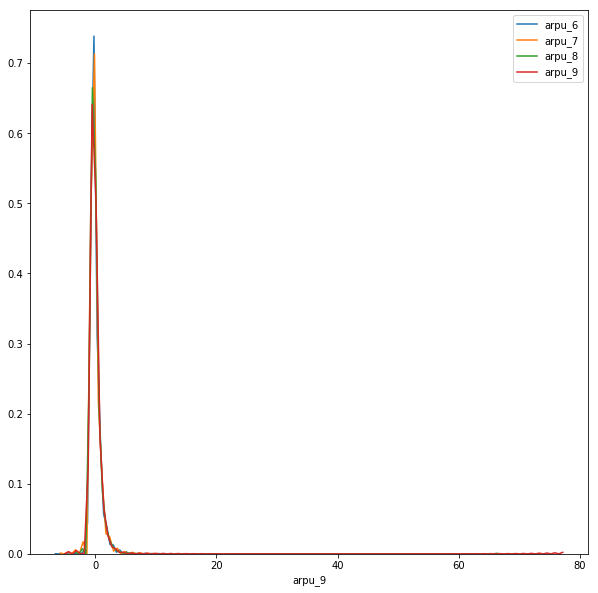

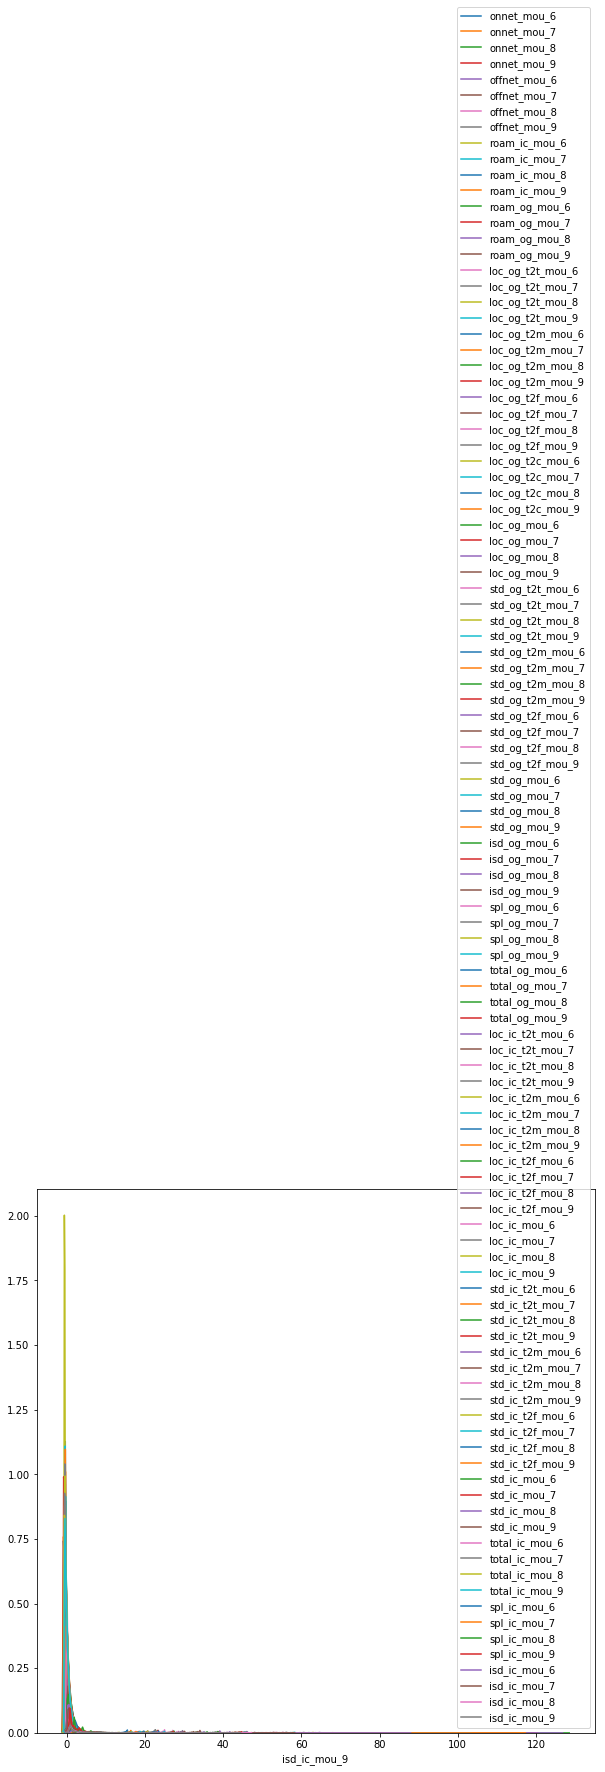

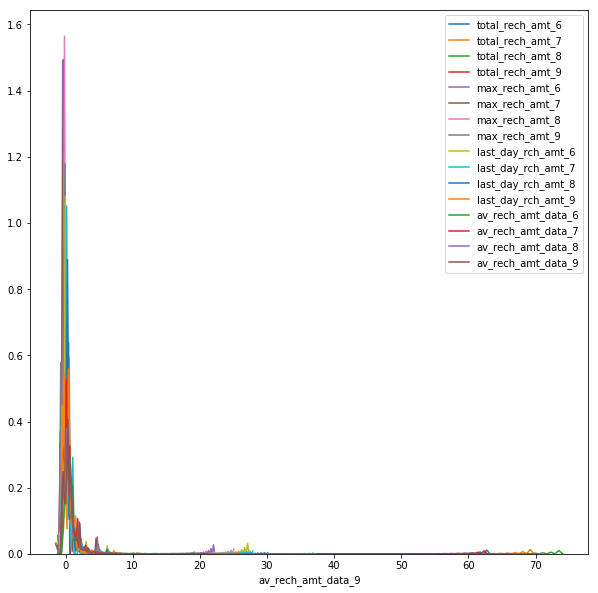

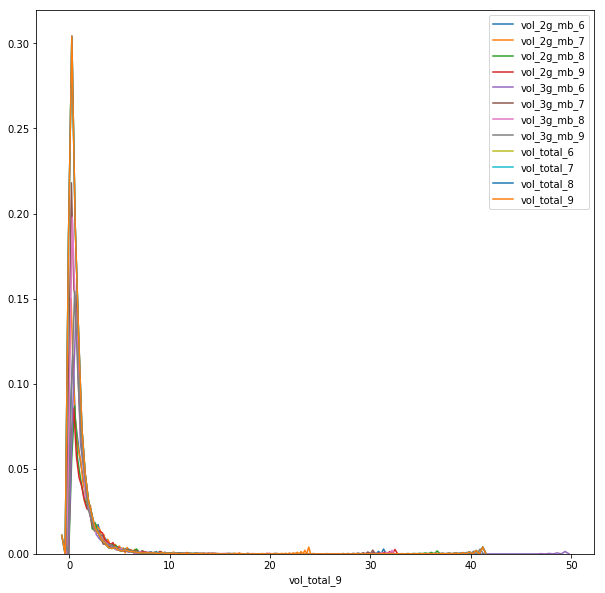

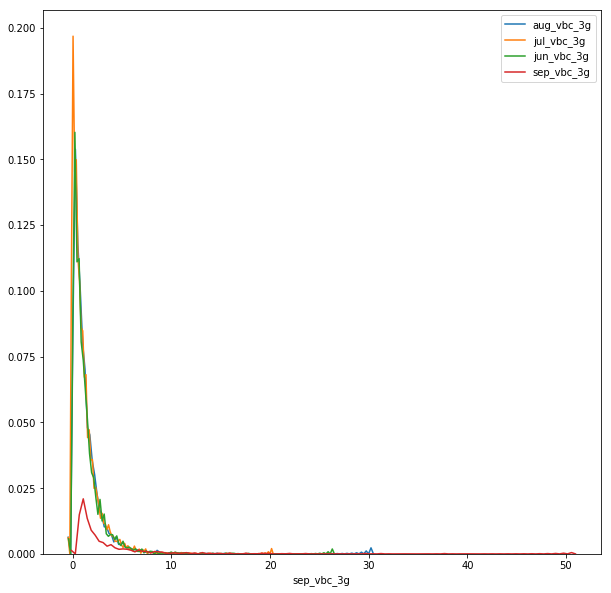

In [26]:
#for mon, mon_data in month_wise_data.items():
%matplotlib inline

for feature in business_features:
    plt.figure(figsize=(10,10))
    feature_df = churn_data.filter(regex=feature)
    plot_multiple_distributions(feature_df, feature_df.columns.values)
   
    

In [ ]:
for feature in business_features:
    feature_df = churn_data.filter(regex=feature)
    print(feature_df.describe())
    print('\n', feature_df.median(), '\n')
    